# OSSEN Tutorial-Elsa Arcaute: Street Network, Community Detection & Accessibility

Authors:
- Elsa Arcaute (e.arcaute@ucl.ac.uk)
- Xiuning Zhang (xiuning.zhang.23@ucl.ac.uk)
- Miao Zeng (miao.zeng.19@ucl.ac.uk)

## Introduction
This tutorial is designed to introduce you to the analysis of urban networks and accessibility using Python. The tutorial is divided into three parts:
1. **Urban Network**: Representing the street system as a network and using the OSMnx library to download and analyze spatial data from OpenStreetMap.
2. **Community Detection**: Using the CDlib library to detect communities in the street network. On top of some well-studies models, here we will apply percolation clustering algorithm to the street network.
3. **Accessibility Modelling**: Using the R5Py library to calculate the travel time matrix and analyze the accessibility of urban amenities in Oxford.

In [ ]:
# Install the packages used in the first two parts of the tutorial
!pip install networkx
!pip install osmnx

In [ ]:
# Install the packages used in the third part of the tutorial
!pip install r5py
!pip install mapclassify

## Part I Urban Network
The 1st part of this tutorial, we will learn one specific kind of urban networks —— the street networks:
1. Understand how to represent the street system as network.
2. Learn to use the OSMnx library.

### 1.Represent Street Network as Graph
![street network representation](street_networks.png)

from: [Street Network Studies: from Networks to Models and their Representations](https://link.springer.com/article/10.1007/s11067-018-9427-9)

###  2.the OSMnx library
It is a python library to help you download and analyze spatial data from OpenStreetMap.
https://osmnx.readthedocs.io/en/stable/

OSMnx is built on top of GeoPandas, and Networkx:
* Downloads and creates a networkx graph ofstreet networks or other infrastructure networks
    * Automatically cleans(topologically corrects) the network for you.
* Download any other spatial geometries (buildings, POI's, place **boundaries**)

#### **Step 1** Install & Import Librarie

In [ ]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### **Step 2** Acquire Street Network

In [ ]:
# We can build a graph by giving the name of the place
G = ox.graph_from_place('Oxford, England, United Kingdom', network_type='drive')
print(type(G))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


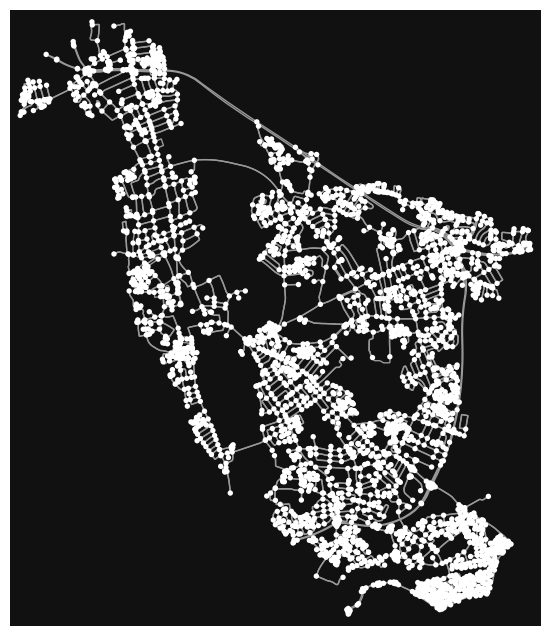

In [ ]:
fig, ax = ox.plot_graph(G)

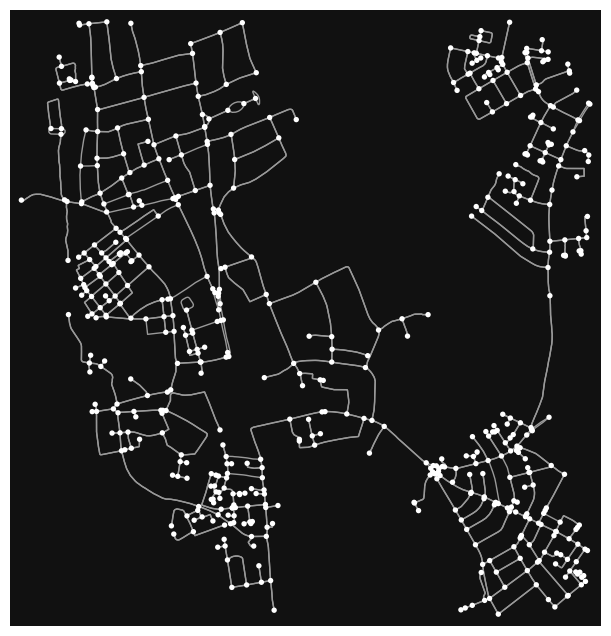

In [ ]:
# We can also build a graph by giving the coordinates and a radius
# ucl = (51.5245593,-0.1358805)

Uni_Oxford = (51.7570,-1.2545)
radius = 1500 #meters
G = ox.graph_from_point(Uni_Oxford, dist=radius, network_type='drive')
fig, ax = ox.plot_graph(G)

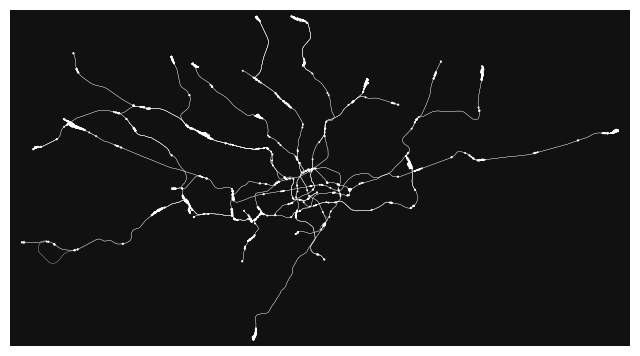

In [ ]:
# We can also get other infrastructure networks
# change the overpass query to meet the new style 'New York, NY, USA'
G = ox.graph_from_place('Greater London, England, United Kingdom',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=2, edge_color='w', edge_linewidth=0.2)


#### **Step 3** Simplify the Street Network

now onto community detection in street networks

to keep it light, we will only be using the city of London

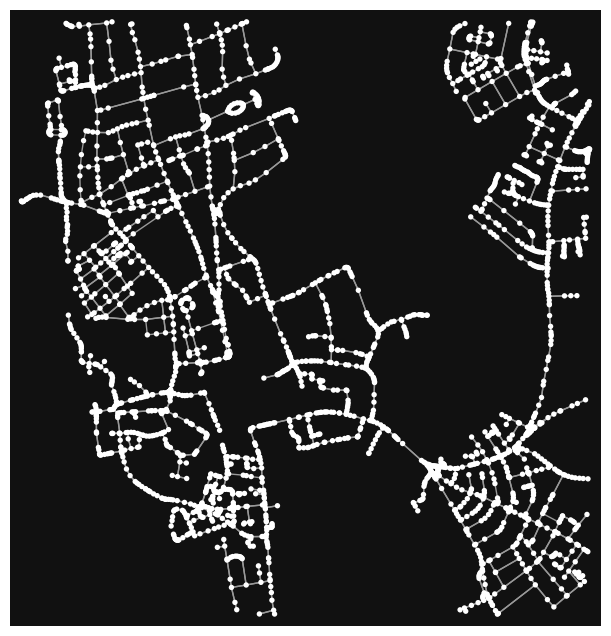

In [ ]:
#get the street network in the University of Oxford
place = 'Oxford, England, United Kingdom'

# I'm setting simplify false here to show how osmnx clean the networks topology
G = ox.graph_from_point(Uni_Oxford, dist=radius, network_type='drive', simplify=False)
fig, ax = ox.plot_graph(G)
# G = ox.simplify_graph(G)

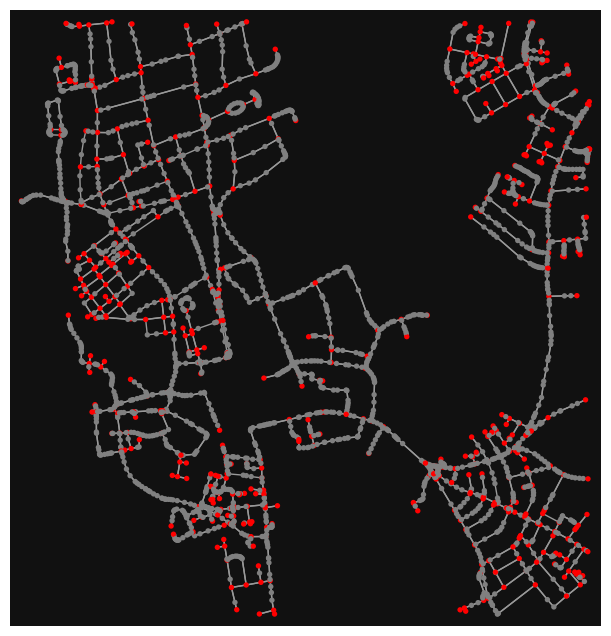

In [ ]:
nc = ['r' if ox.simplification._is_endpoint(G, node, None) else 'grey' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

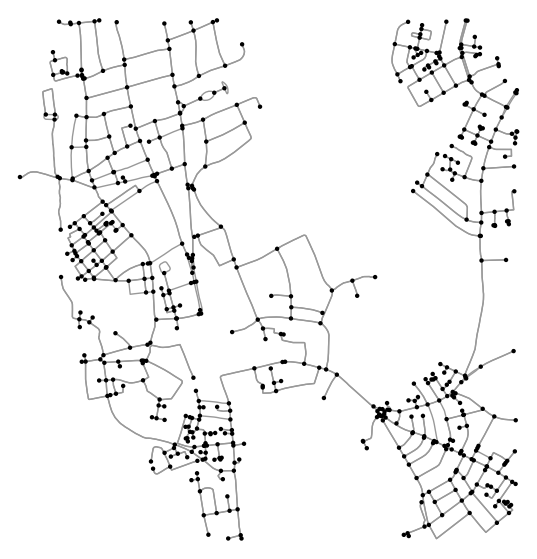

In [ ]:
# simplify the network
fig, ax = plt.subplots(figsize=(12,7))
G = ox.simplify_graph(G)
fig, ax = ox.plot_graph(G,
                        node_color='k',
                        node_size = 10,
                        ax=ax)

In [ ]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G)
stats

{'n': 591,
 'm': 1314,
 'k_avg': 4.446700507614213,
 'edge_length_total': 116723.90600000013,
 'edge_length_avg': 88.8309786910199,
 'streets_per_node_avg': 2.4297800338409474,
 'streets_per_node_counts': {0: 0, 1: 171, 2: 33, 3: 349, 4: 38},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2893401015228426,
  2: 0.05583756345177665,
  3: 0.5905245346869712,
  4: 0.06429780033840947},
 'intersection_count': 420,
 'street_length_total': 61446.08499999996,
 'street_segment_count': 703,
 'street_length_avg': 87.40552631578942,
 'circuity_avg': 1.0685639015280264,
 'self_loop_proportion': 0.002844950213371266}

#### **Step 4** Acquire Other Spatial Data

In [ ]:
# get building footprints for the University of Oxford
buildings = ox.geometries_from_point(Uni_Oxford, dist=radius,tags={'building':True})
# get amenities for the University of Oxford
amenities = ox.geometries_from_point(Uni_Oxford,dist=radius,tags={'amenity':True, 'geometry':'point'})


<ipython-input-12-8db0dac124e3>:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_point(Uni_Oxford, dist=radius,tags={'building':True})
<ipython-input-12-8db0dac124e3>:4: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenities = ox.geometries_from_point(Uni_Oxford,dist=radius,tags={'amenity':True, 'geometry':'point'})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


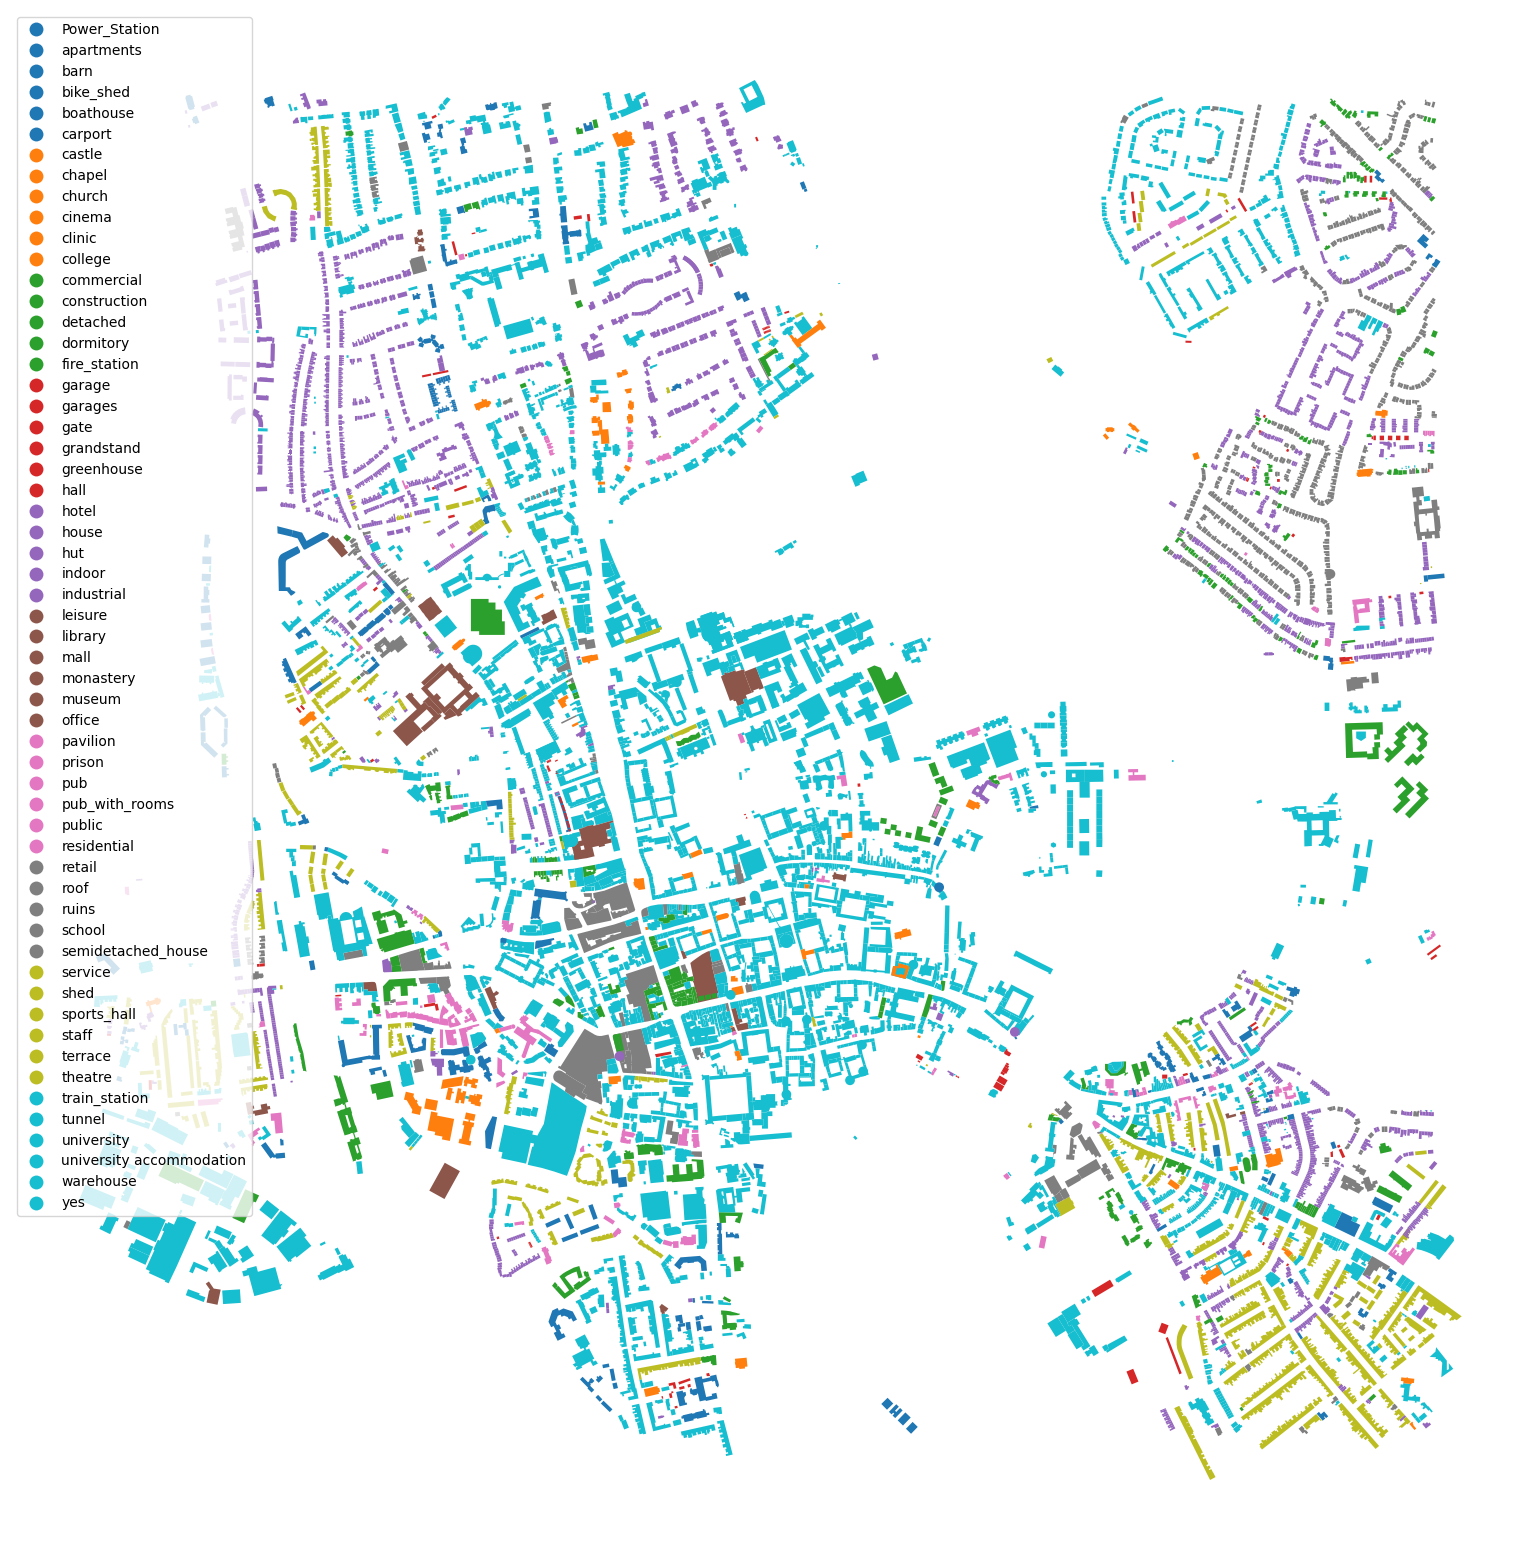

In [ ]:
ax = buildings.plot(column='building', figsize=(20, 20), legend=True)
ax.set_axis_off()

#### **Step 5** Navigation & Routing

<ipython-input-14-7a1538c16c5e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  current_B = buildings[buildings.name.str.contains("Department of Statistics", na=False)].geometry.centroid
<ipython-input-14-7a1538c16c5e>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destination = amenities[amenities.name.str.contains("Lady Margaret Hall", na=False)].geometry.centroid


element_type  osmid   
way           46612531    POINT (-1.25958 51.75887)
              60557011    POINT (-1.25372 51.75806)
              60557023    POINT (-1.25413 51.75796)
dtype: geometry
element_type  osmid    
way           165941249    POINT (-1.25315 51.76563)
dtype: geometry
17126405
2361900472


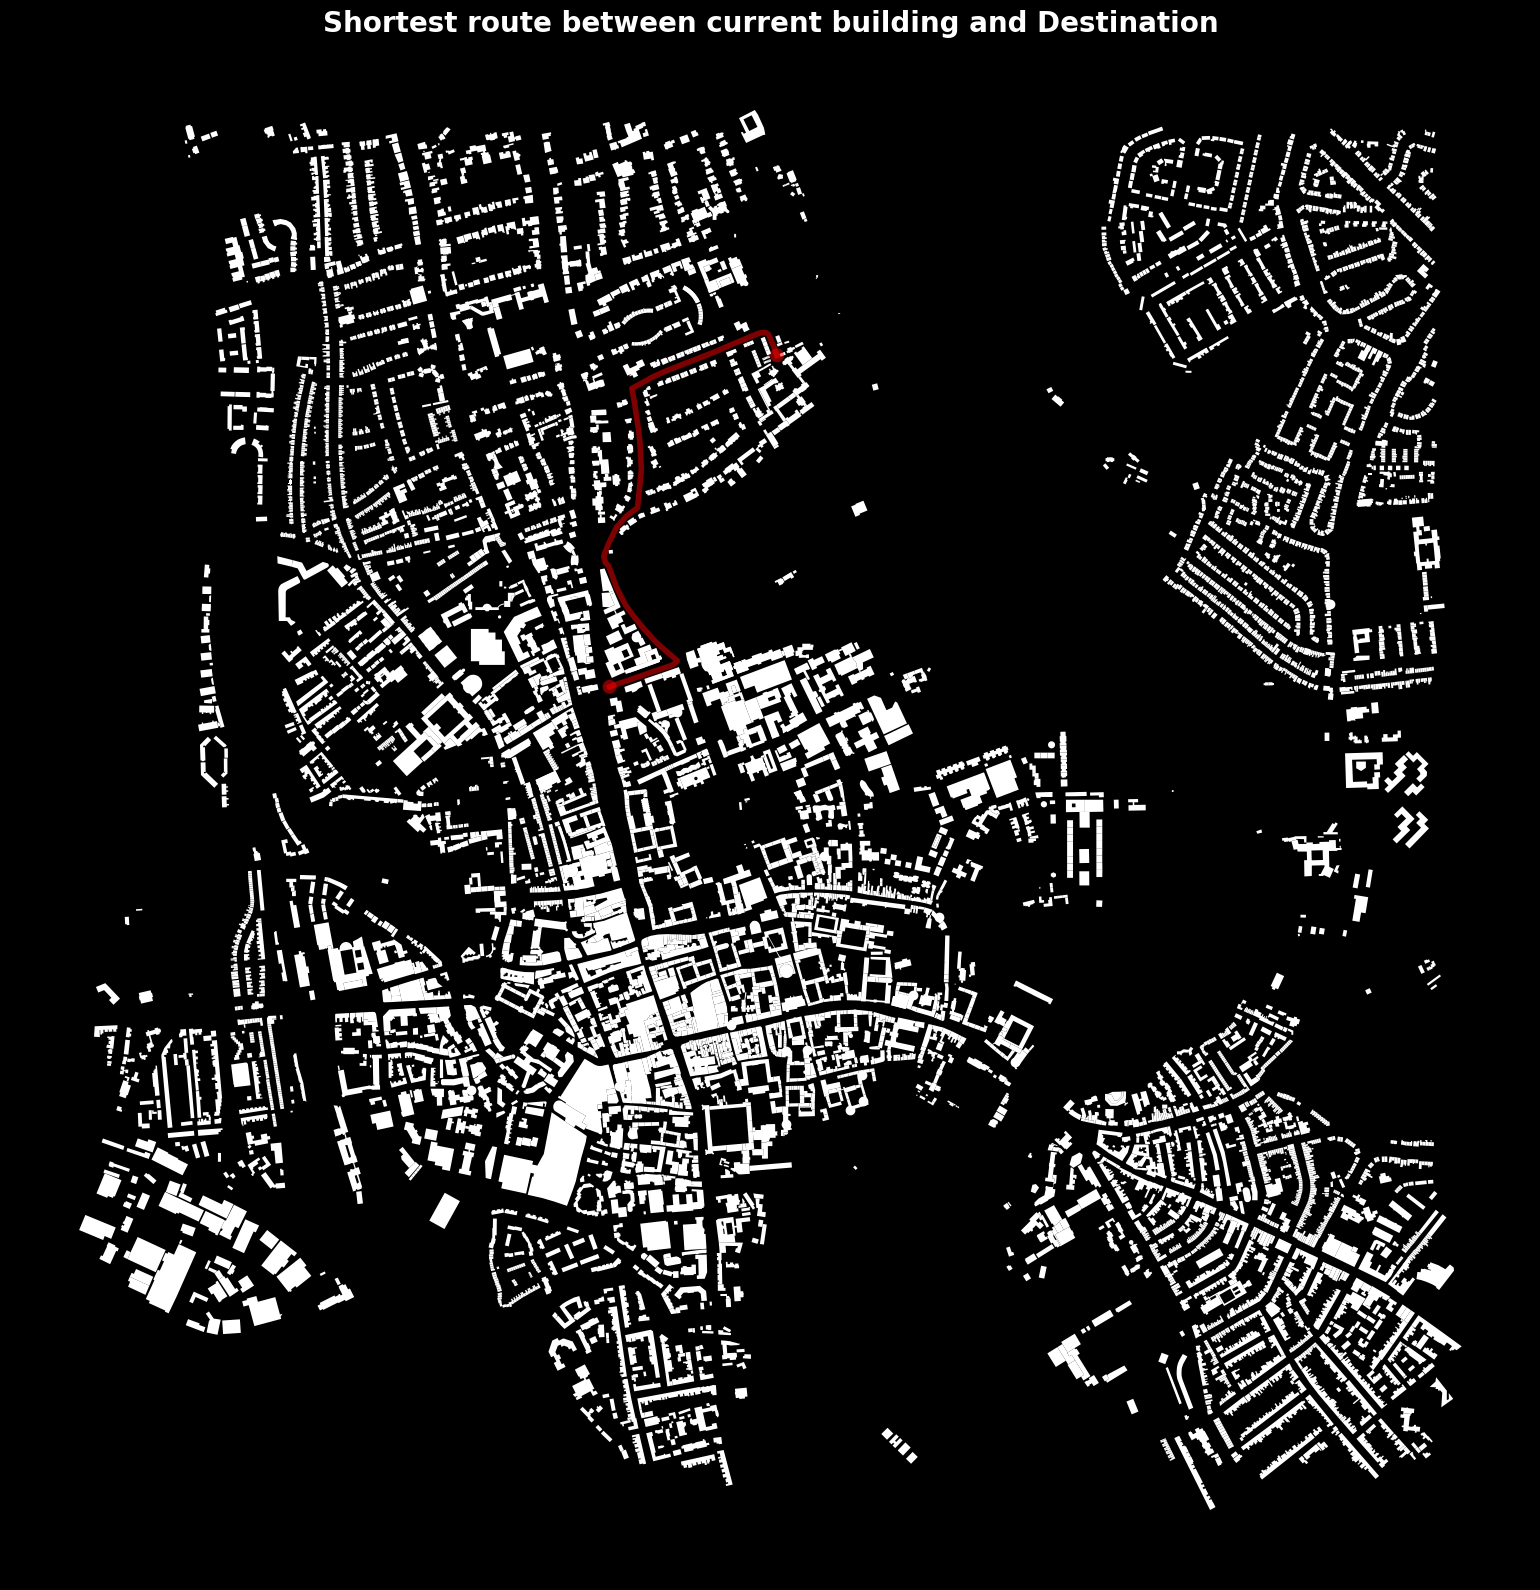

(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': 'Shortest route between current building and Destination'}>)

In [ ]:
current_B = buildings[buildings.name.str.contains("Department of Statistics", na=False)].geometry.centroid
destination = amenities[amenities.name.str.contains("Lady Margaret Hall", na=False)].geometry.centroid
print(current_B)
print(destination)

# get the nearest node to the centroid of St Paul's Cathedral
current_B = ox.nearest_nodes(G, current_B.x[0], current_B.y[0])
print(current_B)
# get the nearest node to the centroid of Lloyd's of London
destination = ox.nearest_nodes(G, destination.x[0], destination.y[0])
print(destination)

# get the shortest path between the two nodes
route = nx.shortest_path(G, current_B, destination, weight='length')

# plot the route
fig, ax = plt.subplots(1, 1, figsize=(20, 20), facecolor='k', subplot_kw=dict(aspect='equal'))

# clean it up
ax.set_facecolor('k')
ax.set_axis_off()

# add a title
ax.set_title('Shortest route between current building and Destination', fontsize=20, color='w', fontweight='bold')

buildings.plot(color='w', ax=ax)
ox.plot_graph_route(G, route, node_size=2, ax=ax)



In [ ]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

In [ ]:
# get pairs in route in moving window of 2
pairs = [(route[i], route[i+1], 0) for i in range(len(route)-1)]

# the edges index has this weird format, with u, v (for nodes) and then an odd 0
print(edges.index[0])
# so we match it
print(pairs[0])
# # osmnx also has a function to do this, but you're better than that
# pairs = ox.utils_graph.get_route_edge_attributes(G, route, 'length')

# look up the edge data for each pair using the 2 index values u, v
paths = edges[edges.index.isin(pairs)]

# how long is the journey?
paths['length'].sum()

# now we can add distances like this into our gravity models

(213398, 213401, 0)
(17126405, 534830, 0)


1261.22

**Exercise**

Now that we have shown you how to build a query to Open Street Map using `custom_filter`, see if you can do one yourself for the city of your choosing.

1. Look at this [table](https://wiki.openstreetmap.org/wiki/Map_features) that shows the names of OSM features
2. Substitute some of those into the query above
4. Make sure do one query that gets amenities, like restaurants or cafes and do another for a class of road

Hit: points of interest, like amenities, come from `geometries_from_*` rather than `graph_from_*`. Use the "tags" field to choose what kinds of features you want to download in this function.

---

Something the may be important to your work will be distinguishing "motorway", "primary", "secondary", "tertiary" roads as well as downloading "footpath". Another thing that OSMnx can do is download amenities, which is important to spatial interaction modelling: amenities can take the place of population at destination when we try to model the attractiveness.




## Part II Community Detection

### 1.Different Community Detection Algorithms

**CDlib**：  a Python library designed for discovering and analyzing communities in complex networks, which offer you different algorithms of community detections. Here we will use the Walktrap community detection algorithm as an example.


**The Walktrap community detection algorithm** identifies communities in a network by performing short random walks, where nodes that are visited together frequently are more likely to belong to the same community.

In [ ]:
pip install cdlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.9 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib

In [ ]:
from cdlib import algorithms
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community.quality import partition_quality

In [ ]:
# let's use random walk, as it's fairly intuive in this setting
partitions = algorithms.walktrap(G)
neighbourhoods = partitions.communities

In [ ]:
# let us print some basic states about the communities found
n_comm = len(neighbourhoods)
mod = modularity(G, neighbourhoods)

#performance does not take multigraph
G_collapsed = ox.utils_graph.get_digraph(G, weight='length')
performance = partition_quality(G_collapsed, neighbourhoods)
print(f"""
{n_comm} communities found
modularity: {mod}
performance: {performance}
""")


37 communities found
modularity: 0.8809513053429986
performance: (0.9267734553775744, 0.963494794803407)



let's plot to get a better idea of

In [ ]:
# let's build a dictionary with nodes as keys and cluster assignment
node_assignment = {}
for cluster, neighbourhood in enumerate(neighbourhoods):
    for node in neighbourhood:
        node_assignment[node] = cluster

In [ ]:
nx.set_node_attributes(G, node_assignment, 'cluster')

In [ ]:
cls = ox.plot.get_node_colors_by_attr(G, 'cluster', cmap='tab20')

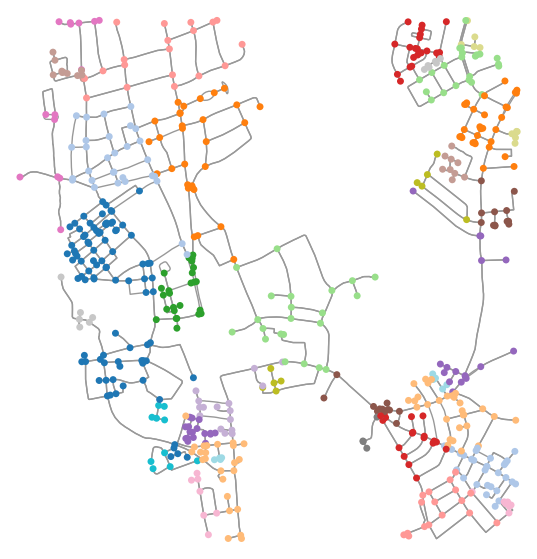

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

fig, ax = ox.plot_graph(G,
                        node_color=cls,
                        node_size = 25,
                        ax=ax)

### 2 Percolation analysis
This section will apply percolation clustering analysis to the street network.

In the context of active travel accessibility, it can be used to identify the clusters of areas that are connected within a certain travel time threshold. The percolation threshold is the point at which the network transitions from a collection of isolated clusters to a single connected cluster. This method can help to identify the most accessible areas and the connections between them.

#### **Step 1** Import

In [ ]:
import networkx as nx
import pandas as pd
import geopandas as gpd
from osgeo import gdal

#### **Step 2** Get A Graph

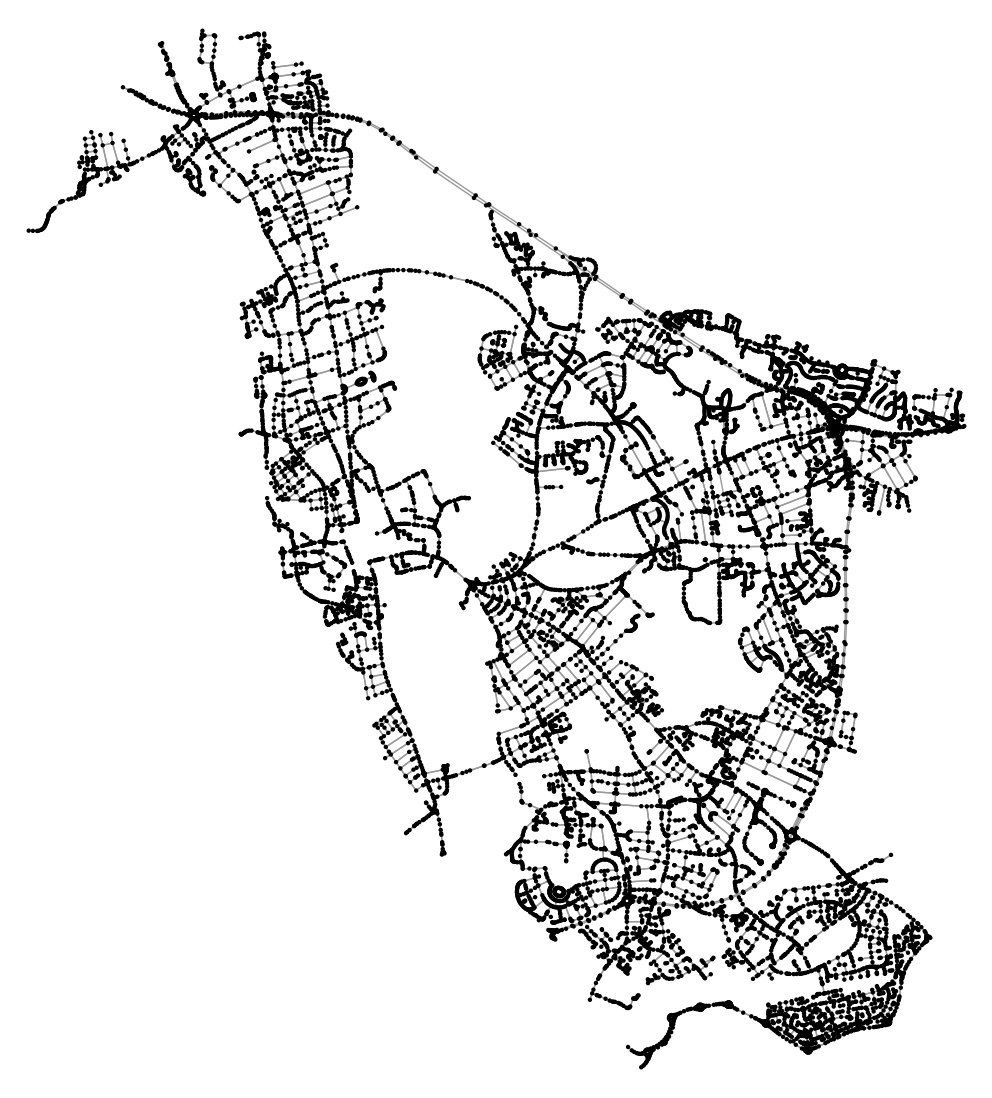

In [ ]:
#get the street network in the University of Oxford
place = 'Oxford, England, United Kingdom'

# I'm setting simplify false here to show how osmnx clean the networks topology
G1 = ox.graph_from_place(place, network_type='drive', simplify=False)
fig, ax = plt.subplots(figsize=(24,14))
fig, ax = ox.plot_graph(G1,
                        node_color='k',
                        node_size = 10,
                        ax=ax)

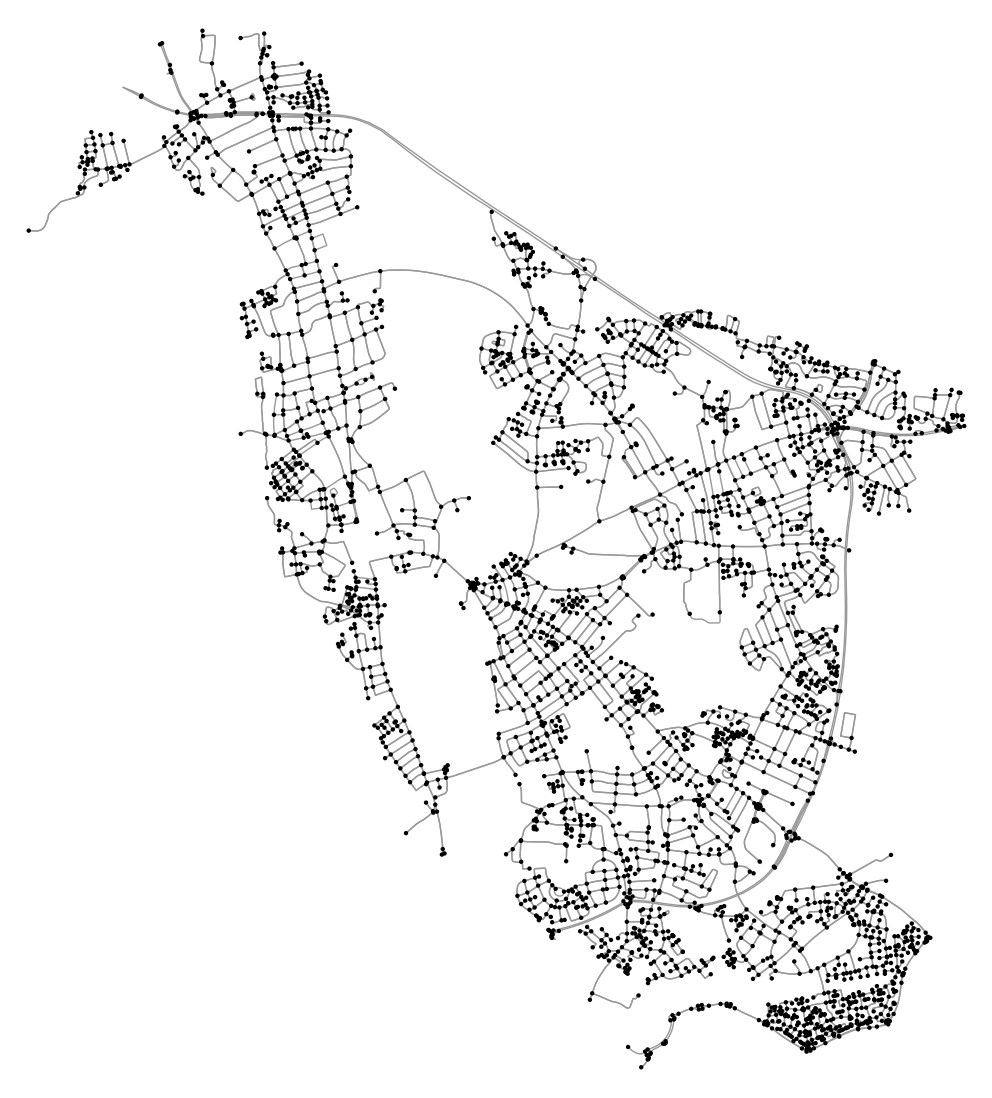

In [ ]:
# simplify the network
G1 = ox.simplify_graph(G1)
fig, ax = plt.subplots(figsize=(24,14))
fig, ax = ox.plot_graph(G1,
                        node_color='k',
                        node_size = 10,
                        ax=ax)

#### **Step 3** Transform to A Undirected Graph

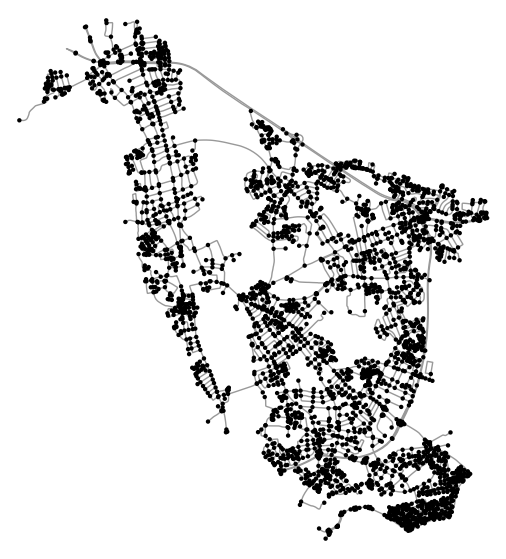

In [ ]:
# convert your MultiDiGraph to an undirected MultiGraph
G2 = ox.convert.to_undirected(G1)

fig, ax = plt.subplots(figsize=(12,7))
fig, ax = ox.plot_graph(G2,
                        node_color='k',
                        node_size = 10,
                        ax=ax)

#### **Step 4** Check Edges & Nodes

In [ ]:
# From Graph to GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G1)
edges

osmid  oneway   lanes  ref  \
u           v           key                                                  
213309      8399368007  0                   148359466    True       2  A40   
            10069541058 0                   904416096    True     NaN  NaN   
213313      185420032   0                    37728512   False     NaN  NaN   
            213315      0      [37728513, 1136744506]    True  [3, 4]  A40   
213315      1549114433  0                   141527584    True     NaN  NaN   
...                                               ...     ...     ...  ...   
11935651688 11935823423 0    [1279133306, 1277858123]   False       2  NaN   
11935823423 11863259795 0    [1277858121, 1277937783]   False     NaN  NaN   
            11862527048 0    [1277858121, 1277858124]   False     NaN  NaN   
            11935651688 0    [1279133306, 1277858123]   False       2  NaN   
11935835319 6287538934  0                   815922386   False     NaN  NaN   

                                        name      highway maxspeed  \
u           v           key                                          
213309      8399368007  0        London Road        trunk   50 mph   
            10069541058 0                NaN   trunk_link   50 mph   
213313      185420032   0    Collinwood Road  residential   20 mph   
            213315      0        London Road        trunk   30 mph   
213315      1549114433  0                NaN   trunk_link   30 mph   
...                                      ...          ...      ...   
11935651688 11935823423 0      McClean Drive  residential   20 mph   
11935823423 11863259795 0     Boyce Crescent  residential   20 mph   
            11862527048 0     Boyce Crescent  residential   20 mph   
            11935651688 0      McClean Drive  residential   20 mph   
11935835319 6287538934  0        The Willows  residential      NaN   

                                  reversed   length  \
u           v           key                           
213309      8399368007  0            False   99.218   
            10069541058 0            False  112.399   
213313      185420032   0             True   21.860   
            213315      0            False  235.689   
213315      1549114433  0            False   35.299   
...                                    ...      ...   
11935651688 11935823423 0    [False, True]   93.220   
11935823423 11863259795 0            False    8.910   
            11862527048 0             True  100.034   
            11935651688 0    [False, True]   93.220   
11935835319 6287538934  0             True   19.348   

                                                                      geometry  \
u           v           key                                                      
213309      8399368007  0    LINESTRING (-1.18040 51.76290, -1.18171 51.762...   
            10069541058 0    LINESTRING (-1.18040 51.76290, -1.18071 51.762...   
213313      185420032   0    LINESTRING (-1.19174 51.76240, -1.19178 51.76221)   
            213315      0    LINESTRING (-1.19174 51.76240, -1.19309 51.762...   
213315      1549114433  0    LINESTRING (-1.19509 51.76282, -1.19532 51.762...   
...                                                                        ...   
11935651688 11935823423 0    LINESTRING (-1.20891 51.76857, -1.20891 51.768...   
11935823423 11863259795 0    LINESTRING (-1.20860 51.76935, -1.20855 51.769...   
            11862527048 0    LINESTRING (-1.20860 51.76935, -1.20866 51.769...   
            11935651688 0    LINESTRING (-1.20860 51.76935, -1.20861 51.769...   
11935835319 6287538934  0    LINESTRING (-1.20467 51.76379, -1.20461 51.763...   

                            junction access width bridge est_width tunnel  
u           v           key                                                
213309      8399368007  0        NaN    NaN   NaN    NaN       NaN    NaN  
            10069541058 0        NaN    NaN   NaN    NaN       NaN    NaN  
213313      185420032   0        Na

In [ ]:
nodes

y         x  street_count highway  \
osmid                                                    
213309       51.762899 -1.180401             3     NaN   
213310       51.763049 -1.180641             2     NaN   
213313       51.762403 -1.191741             3     NaN   
213315       51.762825 -1.195089             3     NaN   
213318       51.763100 -1.196393             3     NaN   
...                ...       ...           ...     ...   
11868535406  51.751680 -1.237404             3     NaN   
11871616420  51.764161 -1.196009             1     NaN   
11935651688  51.768568 -1.208913             1     NaN   
11935823423  51.769350 -1.208596             3     NaN   
11935835319  51.763794 -1.204672             1     NaN   

                              geometry  
osmid                                   
213309       POINT (-1.18040 51.76290)  
213310       POINT (-1.18064 51.76305)  
213313       POINT (-1.19174 51.76240)  
213315       POINT (-1.19509 51.76282)  
213318       POINT (-1.19639 51.76310)  
...                                ...  
11868535406  POINT (-1.23740 51.75168)  
11871616420  POINT (-1.19601 51.76416)  
11935651688  POINT (-1.20891 51.76857)  
11935823423  POINT (-1.20860 51.76935)  
11935835319  POINT (-1.20467 51.76379)  

[3445 rows x 5 columns]

In [ ]:
# From Graph to GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G2)
edges

osmid  oneway lanes   ref  \
u           v           key                                                 
213309      8399368007  0                   148359466    True     2   A40   
            10069541058 0                   904416096    True   NaN   NaN   
            8399367992  0                   148359466    True     2   A40   
213310      8399368008  0                     2898162    True     2   A40   
213313      185420032   0                    37728512   False   NaN   NaN   
...                                               ...     ...   ...   ...   
11751666882 11751666888 1    [1264990435, 1264990436]    True     1   NaN   
11862527048 11935823423 0    [1277858121, 1277858124]   False   NaN   NaN   
11863259795 11935823423 0    [1277858121, 1277937783]   False   NaN   NaN   
11868535405 11868535406 0                  1278435463    True     2  A420   
11935651688 11935823423 0    [1279133306, 1277858123]   False     2   NaN   

                                        name       highway maxspeed  \
u           v           key                                           
213309      8399368007  0        London Road         trunk   50 mph   
            10069541058 0                NaN    trunk_link   50 mph   
            8399367992  0        London Road         trunk   50 mph   
213310      8399368008  0        London Road         trunk   50 mph   
213313      185420032   0    Collinwood Road   residential   20 mph   
...                                      ...           ...      ...   
11751666882 11751666888 1                NaN  unclassified      NaN   
11862527048 11935823423 0     Boyce Crescent   residential   20 mph   
11863259795 11935823423 0     Boyce Crescent   residential   20 mph   
11868535405 11868535406 0       London Place       primary   20 mph   
11935651688 11935823423 0      McClean Drive   residential   20 mph   

                                  reversed   length  \
u           v           key                           
213309      8399368007  0            False   99.218   
            10069541058 0            False  112.399   
            8399367992  0            False   37.597   
213310      8399368008  0            False   86.949   
213313      185420032   0            False   21.860   
...                                    ...      ...   
11751666882 11751666888 1            False   89.179   
11862527048 11935823423 0             True  100.034   
11863259795 11935823423 0            False    8.910   
11868535405 11868535406 0            False   36.458   
11935651688 11935823423 0    [False, True]   93.220   

                                                                      geometry  \
u           v           key                                                      
213309      8399368007  0    LINESTRING (-1.18040 51.76290, -1.18171 51.762...   
            10069541058 0    LINESTRING (-1.18040 51.76290, -1.18071 51.762...   
            8399367992  0    LINESTRING (-1.17987 51.76298, -1.18040 51.76290)   
213310      8399368008  0    LINESTRING (-1.18187 51.76287, -1.18131 51.762...   
213313      185420032   0    LINESTRING (-1.19178 51.76221, -1.19174 51.76240)   
...                                                                        ...   
11751666882 11751666888 1    LINESTRING (-1.28354 51.79157, -1.28369 51.791...   
11862527048 11935823423 0    LINESTRING (-1.20860 51.76935, -1.20866 51.769...   
11863259795 11935823423 0    LINESTRING (-1.20860 51.76935, -1.20855 51.769...   
11868535405 11868535406 0    LINESTRING (-1.23699 51.75188, -1.23711 51.751...   
11935651688 11935823423 0    LINESTRING (-1.20860 51.76935, -1.20861 51.769...   

                                    from           to junction access width  \
u           v           key                                                   
213309      8399368007  0         213309   8399368007      NaN    NaN   NaN   
            10069541058 0         213309  10069541058      NaN    NaN   NaN   
            8399367992 

In [ ]:
nodes

y         x  street_count highway  \
osmid                                                    
213309       51.762899 -1.180401             3     NaN   
213310       51.763049 -1.180641             2     NaN   
213313       51.762403 -1.191741             3     NaN   
213315       51.762825 -1.195089             3     NaN   
213318       51.763100 -1.196393             3     NaN   
...                ...       ...           ...     ...   
11868535406  51.751680 -1.237404             3     NaN   
11871616420  51.764161 -1.196009             1     NaN   
11935651688  51.768568 -1.208913             1     NaN   
11935823423  51.769350 -1.208596             3     NaN   
11935835319  51.763794 -1.204672             1     NaN   

                              geometry  
osmid                                   
213309       POINT (-1.18040 51.76290)  
213310       POINT (-1.18064 51.76305)  
213313       POINT (-1.19174 51.76240)  
213315       POINT (-1.19509 51.76282)  
213318       POINT (-1.19639 51.76310)  
...                                ...  
11868535406  POINT (-1.23740 51.75168)  
11871616420  POINT (-1.19601 51.76416)  
11935651688  POINT (-1.20891 51.76857)  
11935823423  POINT (-1.20860 51.76935)  
11935835319  POINT (-1.20467 51.76379)  

[3445 rows x 5 columns]

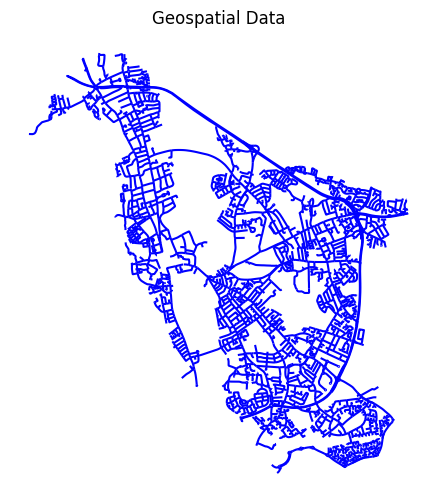

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# You can customize the plot with different options
edges.plot(ax=ax, color='blue', edgecolor='black')

# Optionally, you can add titles and labels
ax.set_title('Geospatial Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_axis_off()

# Show the plot
plt.show()

In [ ]:
data_coords = nodes[["x","y"]]
data_coords

# edgelist = edges[['from', 'to', 'length','geometry']]
# edgelist

x          y
osmid                           
213309      -1.180401  51.762899
213310      -1.180641  51.763049
213313      -1.191741  51.762403
213315      -1.195089  51.762825
213318      -1.196393  51.763100
...               ...        ...
11868535406 -1.237404  51.751680
11871616420 -1.196009  51.764161
11935651688 -1.208913  51.768568
11935823423 -1.208596  51.769350
11935835319 -1.204672  51.763794

[3445 rows x 2 columns]

In [ ]:
data_coords['id_point'] = data_coords.index
data_coords

x          y     id_point
osmid                                        
213309      -1.180401  51.762899       213309
213310      -1.180641  51.763049       213310
213313      -1.191741  51.762403       213313
213315      -1.195089  51.762825       213315
213318      -1.196393  51.763100       213318
...               ...        ...          ...
11868535406 -1.237404  51.751680  11868535406
11871616420 -1.196009  51.764161  11871616420
11935651688 -1.208913  51.768568  11935651688
11935823423 -1.208596  51.769350  11935823423
11935835319 -1.204672  51.763794  11935835319

[3445 rows x 3 columns]

In [ ]:
# Check data types of 'row_name'
print("data types of row_name：", data_coords['id_point'].dtype)

row_name列的数据类型： int64


#### **Step 5** Percolation
The process consists of a series of thresholdings of the network, in which weak links get disconnected. For each threshold, different subgraphs emerged as the network starts to disconnect. The thresholds are NOT universal. Note that the networks from the OMS are incomplete, hence more detail, referring to smaller streets being present, will only be given in cities where the effort to map those streets has been put into it. Hence, different distances will be found for the transitions in different cities, and these might be given just by a problem of data resolution.

First let us define the vector containing the percolation thresholds of interest

First let us define the vector containing the percolation thresholds of interest

In [ ]:
import numpy as np

rmin = 10
rmax = 311
r0 = np.arange(rmin, rmax, 10)
n_loops = len(r0)

file_clust_size = 'cluster_size.txt'
with open(file_clust_size, 'w') as file:
    file.write('threshold\t size\n')

In [ ]:
n_loops

31

In [ ]:
r0

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310])

Define the thresholds to plot the maps

In [ ]:
# import matplotlib.pyplot as plt

# # Define the colors for the top 10 clusters
# top10 = [plt.cm.tab20c(i) for i in [19, 1, 11, 29, 4, 5, 22, 2, 3, 0]]

# top10
top10 = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']
top10

['red',
 'green',
 'blue',
 'orange',
 'purple',
 'yellow',
 'pink',
 'cyan',
 'magenta',
 'brown']

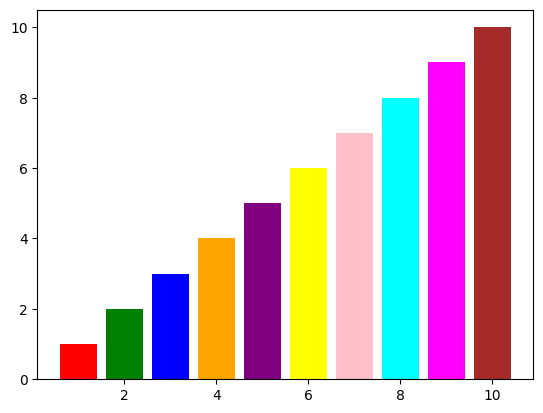

In [ ]:
# Visualize the colors
plt.bar(range(1, 11), range(1, 11), color=top10)
plt.show()

In [ ]:
jumps_2plot = [90, 150, 190, 200,310]
# jumps_2plot = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

In [ ]:
# Obtain the node counts of the network
size_net = G2.number_of_nodes()
size_net

3445

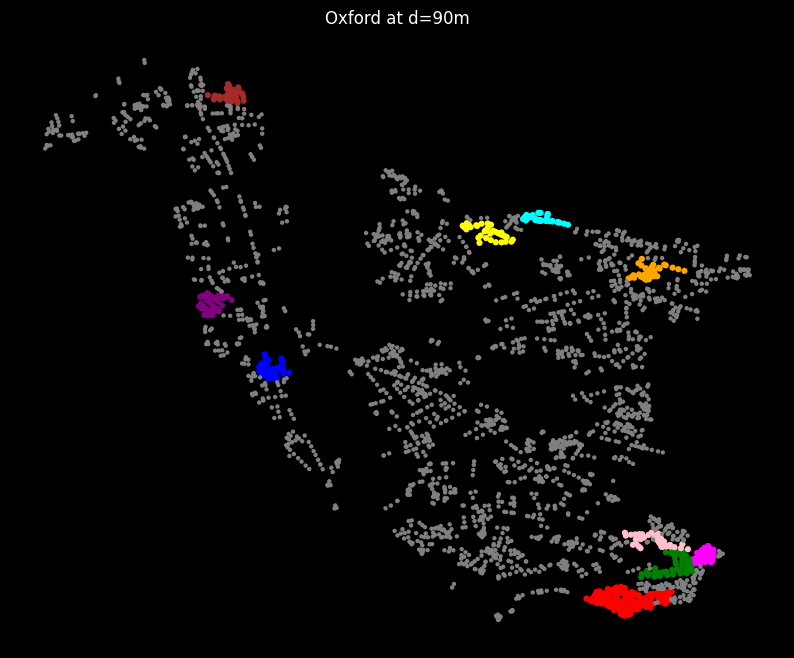

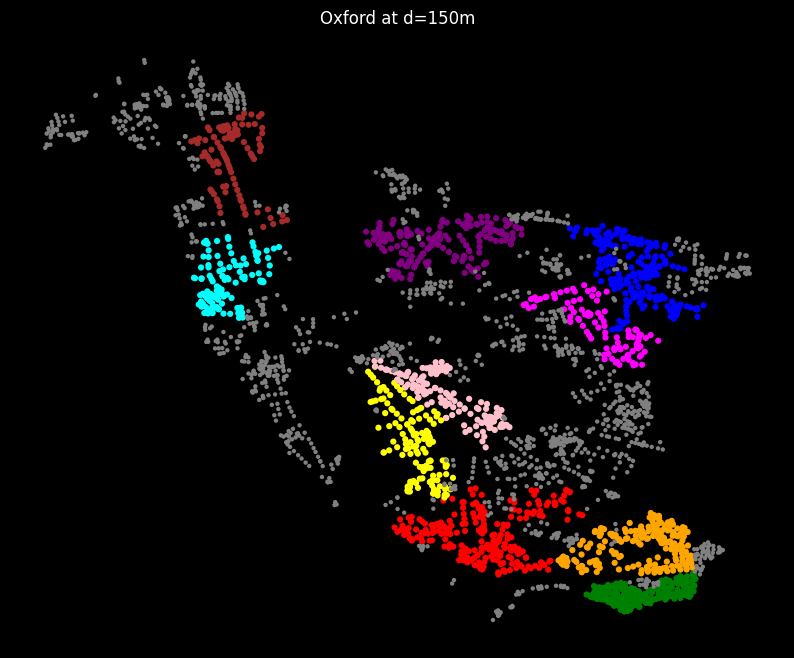

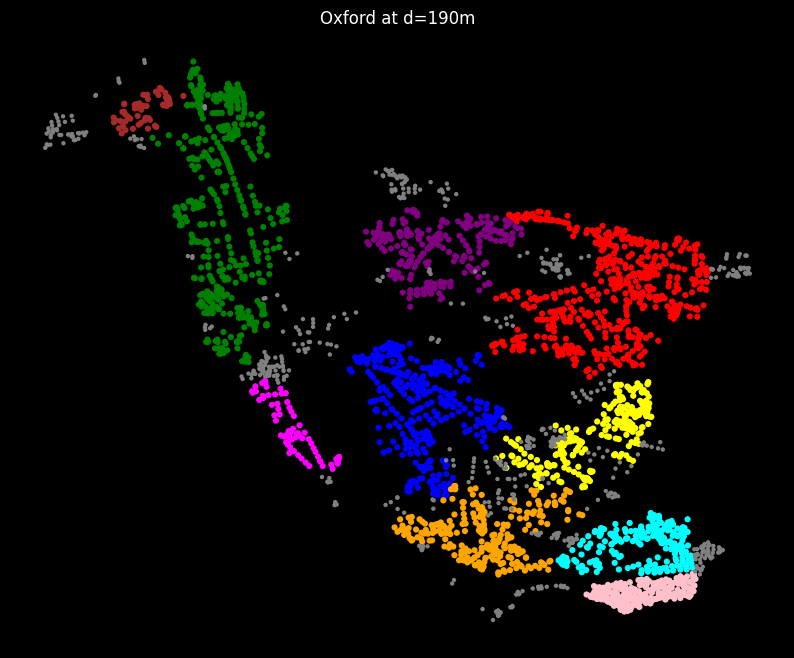

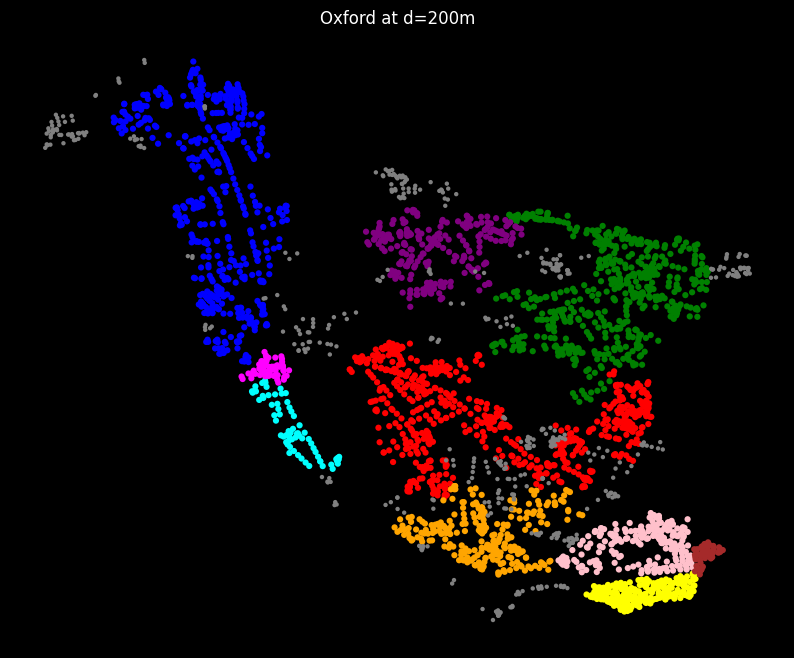

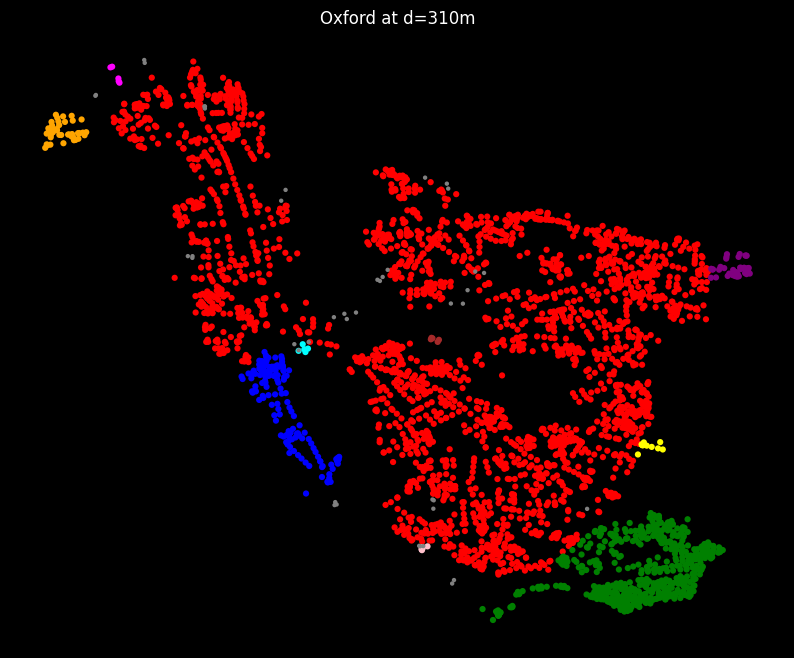

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i_t in r0:
    # Find subgraph such that all weights <= threshold r0
    edges = [(u, v, d) for u, v, d in G2.edges(data=True) if d['length'] <= i_t]
    g = nx.Graph()
    g.add_edges_from(edges)
    g.remove_nodes_from(list(nx.isolates(g)))

    # Take subcomponents
    membclusters = {node: cid for cid, component in enumerate(nx.connected_components(g)) for node in component}

    m = pd.DataFrame(list(membclusters.items()), columns=["id_point", "id_cluster"])

    # File for membership table for each threshold
    #file_name = f"{dir_memb}/London_p{i_t}.txt"
    #m.to_csv(file_name, index=False)

    table_data = m['id_cluster'].value_counts()

    # Largest connected component
    LCC = table_data.max()
    LCC_p = LCC / size_net
    v_LCC = [i_t, LCC, LCC_p]

    if i_t == rmin:
        v_LCC_t = np.array([v_LCC])
    else:
        v_LCC_t = np.vstack([v_LCC_t, v_LCC])

    sorted_table = table_data.sort_values(ascending=False)
    # file_out = f"{file_n_clust}{i_t}.csv"
    # sorted_table.to_csv(file_out, header=['id_cluster', 'n_points'], index=False)

    # Let us construct at the same time the file with the largest cluster size, i.e. connected component.
    with open(file_clust_size, 'a') as file:
        file.write(f"{i_t},{LCC}\n")

    if i_t in jumps_2plot:
        # Assign colours
        list_clusts = sorted_table.reset_index()
        list_clusts.columns = ["id_cluster", "n_points"]
        list_clusts['colour'] = 'grey'
        list_clusts.loc[:9, 'colour'] = top10
        list_clusts['size'] = 0.1
        list_clusts.loc[:9, 'size'] = 0.2

        total_list = pd.merge(list_clusts, m, on="id_cluster")

        points_coords_cols = pd.merge(total_list, data_coords, on="id_point")
        # file_map = f"{dir_maps}/London_d{i_t}.png"

        # Save the maps
        # plt.savefig(file_map, height=850, width=1000)
        plt.figure(figsize=(10, 8), facecolor='black')
        plt.scatter(points_coords_cols['x'], points_coords_cols['y'], s=points_coords_cols['size'] * 100, c=points_coords_cols['colour'], edgecolor='none')
        plt.title(f"Oxford at d={i_t}m", color='white')
        plt.axis('off')
        plt.show()
        # plt.savefig(file_map)
        # plt.close()


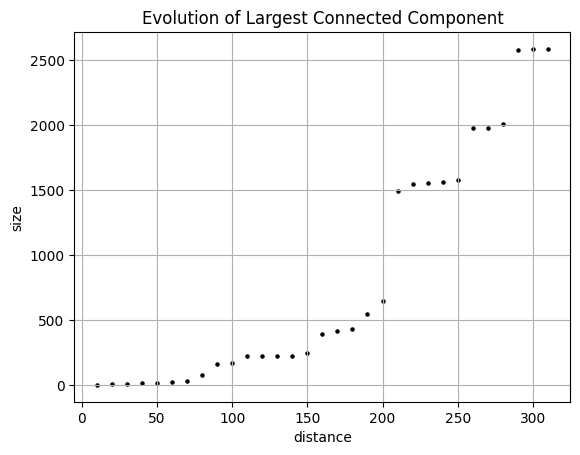

In [ ]:
import matplotlib.pyplot as plt

plt.figure(facecolor='white')

plt.scatter(v_LCC_t[:, 0], v_LCC_t[:, 1], c='black', s=5)  # s参数调整点的大小以匹配cex=0.5

plt.grid(True)

plt.xlabel("distance")
plt.ylabel("size")
plt.title("Evolution of Largest Connected Component")

plt.show()


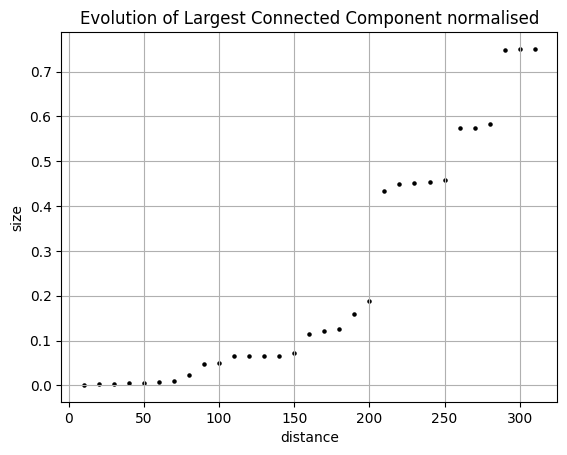

In [ ]:
import matplotlib.pyplot as plt

plt.figure(facecolor='white')

plt.scatter(v_LCC_t[:, 0], v_LCC_t[:, 2], c='black', s=5)  # s参数调整点的大小以匹配cex=0.5

plt.grid(True)

plt.xlabel("distance")
plt.ylabel("size")
plt.title("Evolution of Largest Connected Component normalised")

plt.show()


## Part III Accessibility Modelling using R5Py

This part of the tutorial will introduce you to the R5Py library, which is a Python wrapper for the R5 routing engine. R5 is a multimodal routing engine that can be used to calculate travel times between locations in a city using different modes of transport, such as walking, cycling, and public transport. It is open-source, efficient and use real-time data and OpenStreetMap to provide accurate travel time estimates. 

In this tutorial, we will use R5Py to calculate the travel time matrix between different locations in Oxford and analyze the accessibility of urban amenities in the city.

### Setup
First, we need to clone the repository that contains the data and code for this section tutorial.They can be directly fetched from seprated sources, but here we have already prepared them for you. 
 
The repository contains the following folders:
- `/r5`: Contains the files needed to set up the R5Py, including the Openstreetmap (OSM PBF) file and the Transit Feed (GTFS) file for Oxford.
- `/spatial`: Contains the spatial data for Oxford, including the boundary of the city, the locations of the amenities, and the population grids.
- `/results`: Contains the pre-calculated travel time matrix between the population grids and the amenities in Oxford. Since in beta stage, we found calculating the time matrix cost too much time on Colab. It is prepared to expediate the process.

In [ ]:
!git clone https://github.com/xnzhang-33/OSSEN-Workshop

Cloning into 'OSSEN-Workshop'...
remote: Enumerating objects: 81, done.
remote: Total 81 (delta 0), reused 0 (delta 0), pack-reused 81
Receiving objects: 100% (81/81), 65.84 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (30/30), done.


Then, we will increase the memory available to the notebook to allow for the computation of the travel time matrix. This is important as the computation of the travel time matrix can be memory-intensive, especially for large networks.

In [ ]:
# Allow 12 GB of memory
import sys
sys.argv.append(["--max-memory", "12G"])

In [ ]:
#### Import the necessary libraries ####

# R5Py for travel time matrix computation
from r5py import TransportNetwork, TravelTimeMatrixComputer

# GeoPandas for spatial data manipulation
import geopandas as gpd
import pandas as pd

# General library
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [ ]:
wd = 'OSSEN-Workshop/'

# Import spatial boundaries of Oxford for context; they are obtained from ONS as open geo-boundary data
ox_bound = gpd.read_file(wd + 'spatial/oxford_boundary.geojson').to_crs(epsg=4326)

In [ ]:
# Create the origins and destinations GeoDataFrame for calculating the travel time matrix

# Origins: Population grids in Oxford
# The dataset are retrieved from WorldPop as Contrained and Adjusted Population in 2020 
# (https://www.worldpop.org/geodata/summary?id=24777)
origins = gpd.read_file(wd + 'spatial/oxford_points.geojson')

# Destinations: Amenities in Oxford; for University, it contains all the university buildings; for food, it contains all the food outlets.
# Both datasets were retrieved from OpenStreetMap
destinations_university = gpd.read_file(wd + 'spatial/oxford_university_buildings_centroids.geojson')
destinations_food = gpd.read_file(wd + 'spatial/oxford_food.geojson')

In [ ]:
# Check the first few rows of the origins datasets
origins.head()

In [ ]:
# Check the first few rows of the destinations datasets
destinations_university.head()

In [ ]:
# Plot the features for better understanding
origins.explore(column='VALUE', scheme='natural_breaks',cmap="plasma")

In [ ]:
# You can use .explore() to interactively explore the data or .plot() to plot the data
# destinations_university.explore()
destinations_university.plot()

In [ ]:
# destinations_food.explore()
destinations_food.plot()

### Time matrix and accessibility

To start with the accessibility analysis, we would like to make the simplist case: How long it would take from one certain place to travel to another?

In [ ]:
###### Create a TransportNetwork object in R5Py using the OSM data ######
# This provides a basis for analysis in the entire third section
transport_network = TransportNetwork(
    osm_pbf=wd + 'r5/oxfordshire-latest.osm.pbf', # Path to the OSM PBF file
    gtfs=[wd + 'r5/oxfordbus_1718780465.zip'] # Path to the GTFS file
)

In [ ]:
# Select one point as origin, you can choose any point in the origins dataset

# Some good example could include:
# 1308 - The city center
# 2058 - Department of Stats Building
# 1319 - Lady Margaret Hall

origin = origins.loc[origins['id'] == 1308]

In [ ]:
# Create a TravelTimeMatrixComputer object using R5Py to calculate travel times

# This is a key step as it will determine the travel times between all pairs of origins and destinations in the network
travel_time_computer_point = TravelTimeMatrixComputer(
    transport_network=transport_network,
    origins=origin,
    destinations=origins,
    snap_to_network=True,
    # Below are some of the travel options that can be tweaked as needed
    transport_modes=['WALK','BICYCLE', 'TRANSIT'], # Modes of transport to consider, e.g., 'WALK', 'BICYCLE', 'CAR', 'TRANSIT'
    # speed_walking=3.6,
)

# For more information on the available options, please refer to the R5Py documentation: https://r5py.readthedocs.io/en/latest/

In [ ]:
# Compute travel times between all origins and destinations;
od_matrix_point = travel_time_computer_point.compute_travel_times()

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [ ]:
od_matrix_point.head()
# The calculated time_matrix is vey simple: you have the starting id, and its time of travel to any other location (id).

from_id  to_id  travel_time
0     1308      0           27
1     1308      1           27
2     1308      2           27
3     1308      3           27
4     1308      4           27

In [ ]:
join_point = origins.merge(od_matrix_point, left_on="id", right_on="to_id")
join_point.head()
# You can see how the aggregated data look like. A geometry is introduced to spatially plot the accessibility.

id     VALUE                   geometry  from_id  to_id  travel_time
0   0  4.047740  POINT (-1.28333 51.79583)     1308      0           27
1   1  1.973868  POINT (-1.28250 51.79583)     1308      1           27
2   2  1.742770  POINT (-1.28167 51.79583)     1308      2           27
3   3  1.543149  POINT (-1.28083 51.79583)     1308      3           27
4   4  1.621427  POINT (-1.28000 51.79583)     1308      4           27

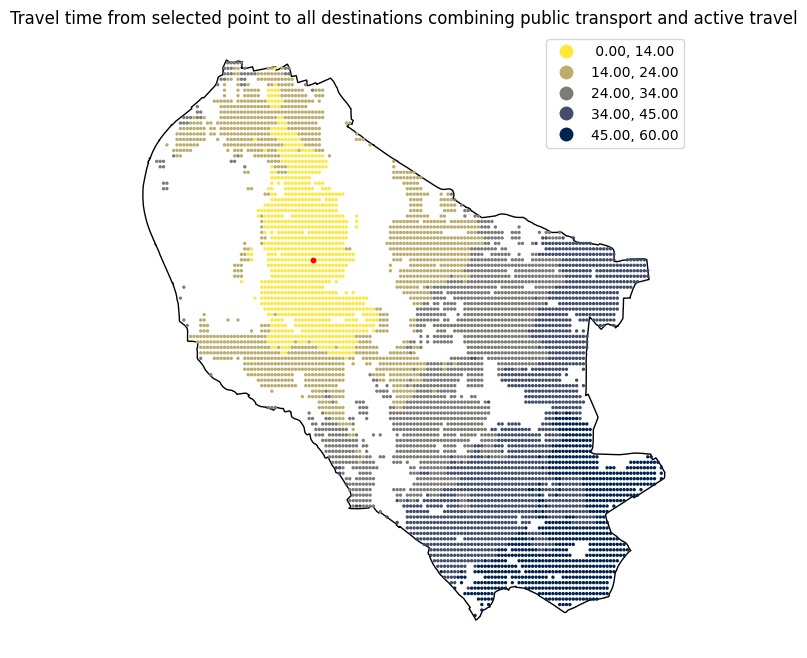

In [ ]:
# Build a plot to show the travel times
fig, ax = plt.subplots(figsize=(10,8))  # Adjust size as needed

# Plot the boundary for context
ox_bound.plot(ax=ax, color='none', scheme='natural_breaks', linewidth=1)
join_point.plot(ax=ax,column="travel_time", cmap="cividis_r",scheme = 'natural_breaks', markersize=2,linewidth=1,legend=True)
origin.plot(ax=ax, color='red', markersize=10,legend=True)

ax.set_title("Travel time from selected point to all destinations combining public transport and active travel")
ax.set_axis_off()

**Q1: What if we are only do it for active travel modes (i.e., walking)?**

We can achieve this by tweaking the travel mode in TravelTimeMatrixComputer. You can give it a try in the following code blocks.

In [ ]:
travel_time_computer_point_walk = TravelTimeMatrixComputer(
# Make your answers here to set up the time matrix computer
)

# Compute travel times between all origins and destinations
od_matrix_point_walk = travel_time_computer_point_walk.compute_travel_times()

# Create the combined matrix
join_point = origins.merge(od_matrix_point_walk, left_on="id", right_on="to_id")
join_point.head()

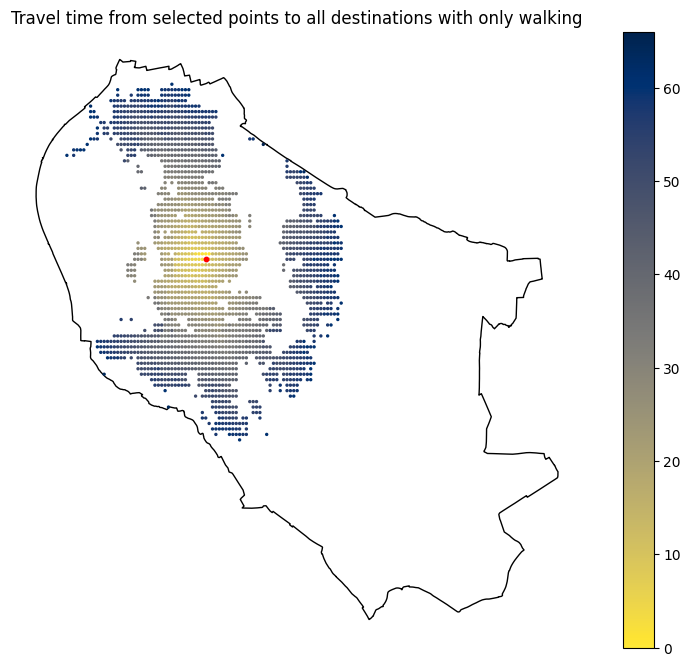

In [ ]:
# You can use this part to plot the result
fig, ax = plt.subplots(figsize=(10,8))  # Adjust size as needed

# Change the following line to your own variable.
# join_point.plot(ax=ax,column="travel_time", cmap="cividis_r",markersize=2,linewidth=1,legend=True)

origin.plot(ax=ax, color='red', markersize=10, scheme='natural_breaks', legend=True)
ox_bound.plot(ax=ax, color='none',linewidth=1)

ax.set_title("Travel time from selected point to all destinations with only walking")
ax.set_axis_off()

### Opportunities accessible within a certain travel time
It is important to understand the accessibility of urban amenities, such as food outlets, schools, and healthcare facilities, to different parts of the city. This information can help urban planners and policymakers identify areas with limited access to essential services and improve the overall accessibility of the city.

Similar case can be made for the accessibility of opportunities, such as jobs and schools. This section will be using the Oxford dataset to demonstrate how to calculate the accessibility of food outlets in the city using R5Py.

In this case, we will calculate the number of food outlets accessible within 25 minutes of sustainable travel (walking, cycling and public transport) from each population grid in Oxford.

In [ ]:
travel_time_computer = TravelTimeMatrixComputer(
    transport_network=transport_network,
    origins=origins,
    destinations=destinations_food, #Here we use all the functions that serves food
    #snap_to_network=True,
    transport_modes=['WALK','BICYCLE', 'TRANSIT'],
)

# od_matrix = travel_time_computer.compute_travel_times()

# Normally we should compute the calculation using colab, but in the beta stage,
# the time it took is too long. So we have referred to a pre-calculated matrix
# for the travel time data. They are the same though!

In [ ]:
od_matrix = pd.read_csv(wd+'results/od_matrix.csv')

In [ ]:
time_threshold = 25

# Filter the OD matrix to include only travel times less than or equal to 25 minutes
filtered_matrix = od_matrix[od_matrix['travel_time'] <= time_threshold]

# Count the number of accessible POIs for each population grid
accessible_pois = filtered_matrix.groupby('from_id').size().reset_index(name='access_foods')

# Merge the accessibility information with the origins GeoDataFrame for plotting
join = origins.merge(accessible_pois, left_on="id", right_on="from_id")

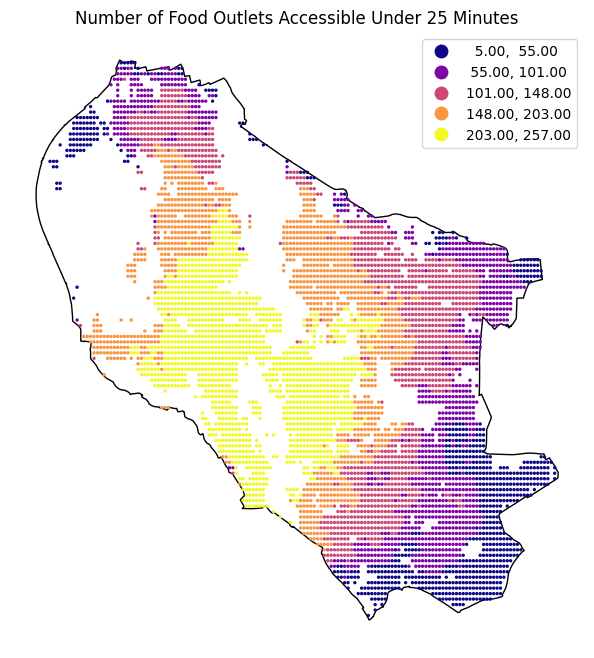

In [ ]:
# Build a plot to show the accessible opportunities
fig, ax = plt.subplots(figsize=(10,8))  # Adjust size as needed

# Plot the Oxford County boundary for context
ox_bound.plot(ax=ax, color='none', scheme='natural_breaks', linewidth=1)

# Plot the number of accessible food outlets aggregated in the above block
join.plot(ax=ax,column="access_foods", scheme='natural_breaks',cmap="plasma",markersize=2,linewidth=1, legend=True)

ax.set_title(f"Number of Food Outlets Accessible Under {time_threshold} Minutes")
ax.set_axis_off()

In [ ]:
# Or instead, you can use explore for an interactive plot.
join.explore(column="access_foods", scheme='natural_breaks',cmap="plasma")

**Q2: Use the `destinations_university` dataset we defined earlier, try to calculate the accessible Oxford University Buildings under 20 minutes walk.**

Or if you are more familiar with spatial data manipulation, try and see what more insights you can extract using this data. For example, you can try and see how for does every place need to go to reach a food stall.

Note: As both dataset contains ~1000 entries, the calculation would involve 10^6 entries of time matrix, so it would probably take a while!

In [ ]:
# You can use the following part of the notebook for answering the question.